In [197]:
from matplotlib import pyplot
from scipy.integrate import odeint
import numpy as np
import math
def plotting_stuff():
    pyplot.grid()
    #pyplot.xticks(fontsize=14,np.arange(min(), max(x)+1, 1.0))
    pyplot.xticks(fontsize=14)
    pyplot.yticks(fontsize=14)
    pyplot.legend(fontsize=13)
    pyplot.legend(fontsize=12,bbox_to_anchor=(1,0.58),loc='upper right')


In [133]:
def diff_systeme(param,t):
    beta=5
    gamma=1
    S,I,R,N=param
    N=S+I+R
    dSdt=(-beta/N)*I*S
    dIdt=((beta/N)*I*S)-(gamma*I)
    dRdt=(gamma*I)
    dN=dSdt+dIdt+dRdt
    
    return [dSdt,dIdt,dRdt,dN]

In [148]:
def resolve_all():
    beta=5
    gamma=1
    S0=9999
    I0=1
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

    pyplot.plot(t,result[:,0],linestyle="-",color='green',linewidth=2,label="Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",color='red',linewidth=2,label="Infectious")
    pyplot.plot(t,result[:,2],linestyle="-",color='orange',linewidth=2,label="Recovered")
    pyplot.plot(t,result[:,3],linestyle="-",color='blue',linewidth=2,label="Total population")

    plotting_stuff()
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    #pyplot.savefig("deterministe_ex2",dpi=300)
        
    
    pyplot.show()
        
        
        
    
    
    

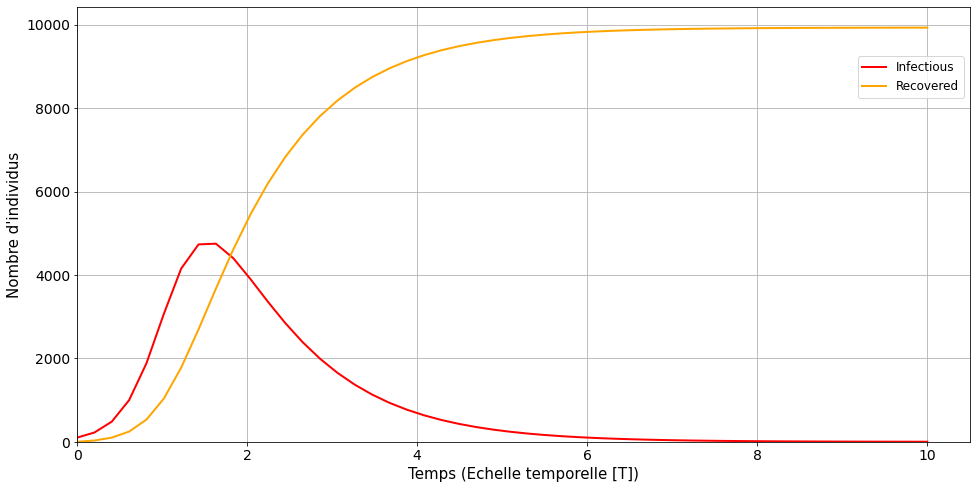

In [149]:
###Test condition I>0 and Ro
def resolve_all_test_Ro():
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

    #pyplot.plot(t[0:5],result[:,0][0:5],linestyle="-",color='green',linewidth=2,label="Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",color='red',linewidth=2,label="Infectious")
    pyplot.plot(t,result[:,2],linestyle="-",color='orange',linewidth=2,label="Recovered")
    #pyplot.plot(t[0:5],result[:,3][0:5],linestyle="-",color='blue',linewidth=2,label="Total population")
    plotting_stuff()
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    pyplot.savefig("deterministe_ex2",dpi=300)
        
    
    pyplot.show()
    
resolve_all_test_Ro()

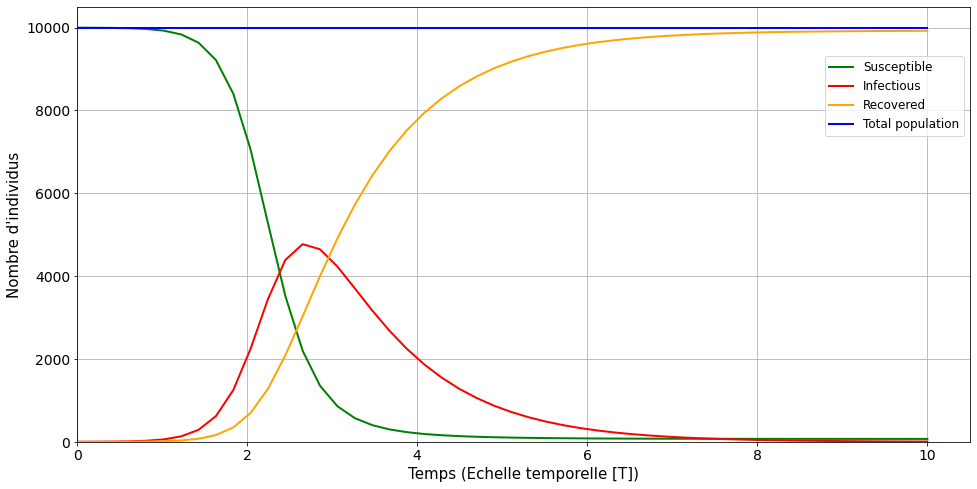

In [150]:
resolve_all()

In [137]:
###Gillespie Alogorithm
def Gillespie_alg(I0,S0,R0,T0,beta,gamma):
    i=I0
    s=S0
    r=R0
    t=T0
    I,S,R,T=[i],[s],[r],[t]
    N=I0+S0+R0
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=(beta/N)*s*i/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
    return I,S,R,T
    

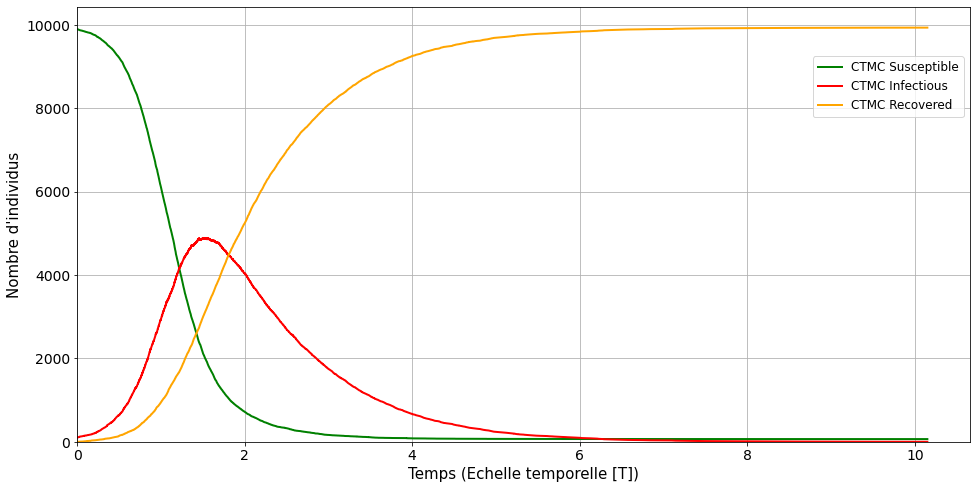

In [138]:
###Gillespie in general
I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
pyplot.figure(figsize=(16,8))
pyplot.plot(T,S,linestyle="-",color='green',linewidth=2,label="CTMC Susceptible")
pyplot.plot(T,I,linestyle="-",color='red',linewidth=2,label="CTMC Infectious")
pyplot.plot(T,R,linestyle="-",color='orange',linewidth=2,label="CTMC Recovered")
#pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("Gillespie",dpi=300)
plotting_stuff()



pyplot.show()

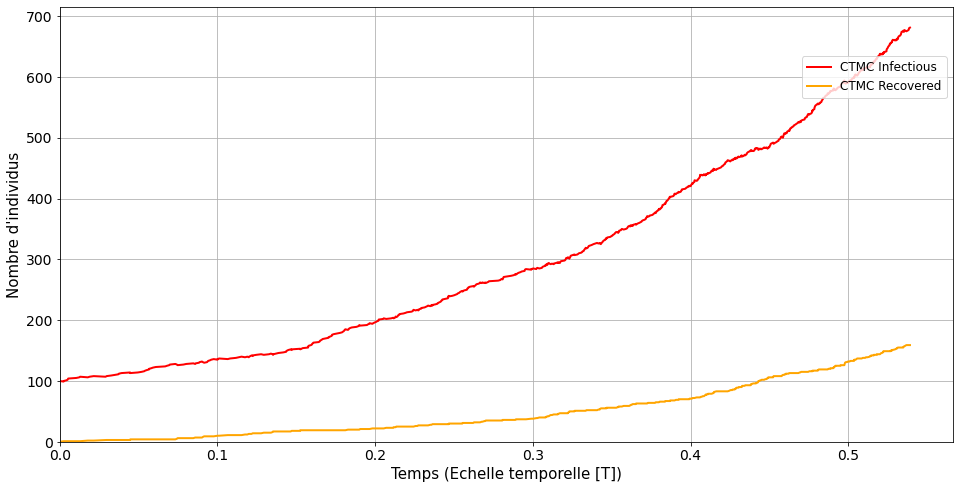

In [139]:
###Zoom Gillespie in general
I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
pyplot.figure(figsize=(16,8))
#pyplot.plot(T[0:9000],S[0:9000],linestyle="-",color='green',linewidth=2,label="CTMC Susceptible")
pyplot.plot(T[0:900],I[0:900],linestyle="-",color='red',linewidth=2,label="CTMC Infectious")
pyplot.plot(T[0:900],R[0:900],linestyle="-",color='orange',linewidth=2,label="CTMC Recovered")
#pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("Gillespie",dpi=300)
plotting_stuff()



pyplot.show()

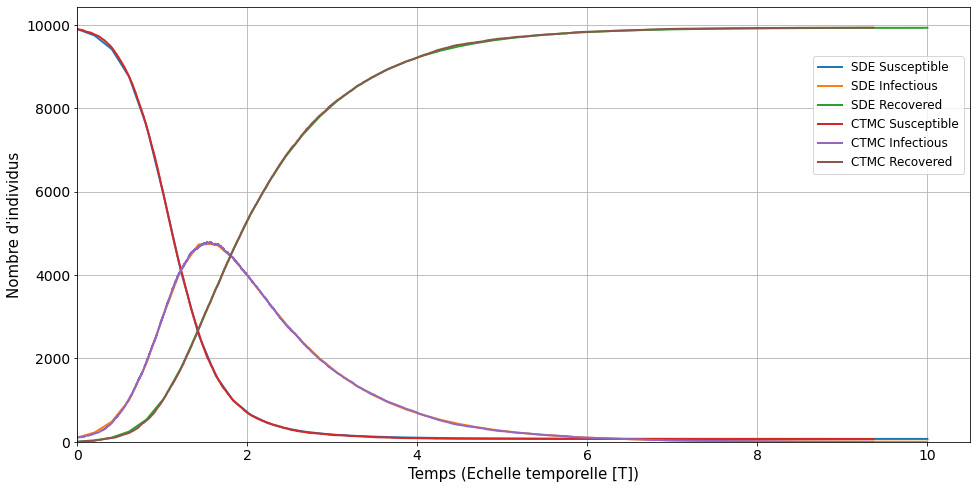

In [142]:
###Comparison Gillespie and SDE
def comp_SDE_Gillespie():
    beta=5
    gamma=1
    S0=9900
    I0=100
    R0=0
    N=S0+R0+I0
    t=np.linspace(0,10)
    
    param_0=[S0,I0,R0,N]
    
    result=odeint(diff_systeme,param_0,t)
    
    pyplot.figure(figsize=(16,8))

    pyplot.plot(t,result[:,0],linestyle="-",linewidth=2,label="SDE Susceptible")
    pyplot.plot(t,result[:,1],linestyle="-",linewidth=2,label="SDE Infectious")
    pyplot.plot(t,result[:,2],linestyle="-",linewidth=2,label="SDE Recovered")
    #pyplot.plot(t,result[:,3],linestyle="-",linewidth=2,label="Total population")
    
    I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
    pyplot.plot(T,S,linestyle="-",linewidth=2,label="CTMC Susceptible")
    pyplot.plot(T,I,linestyle="-",linewidth=2,label="CTMC Infectious")
    pyplot.plot(T,R,linestyle="-",linewidth=2,label="CTMC Recovered")

    plotting_stuff()
    pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
    pyplot.ylabel("Nombre d'individus",size=15)
    pyplot.xlim(0,)
    pyplot.ylim(0,)
    pyplot.savefig("comp_SDE_Gillespie",dpi=300)
        
    
    pyplot.show()
        
    
comp_SDE_Gillespie()

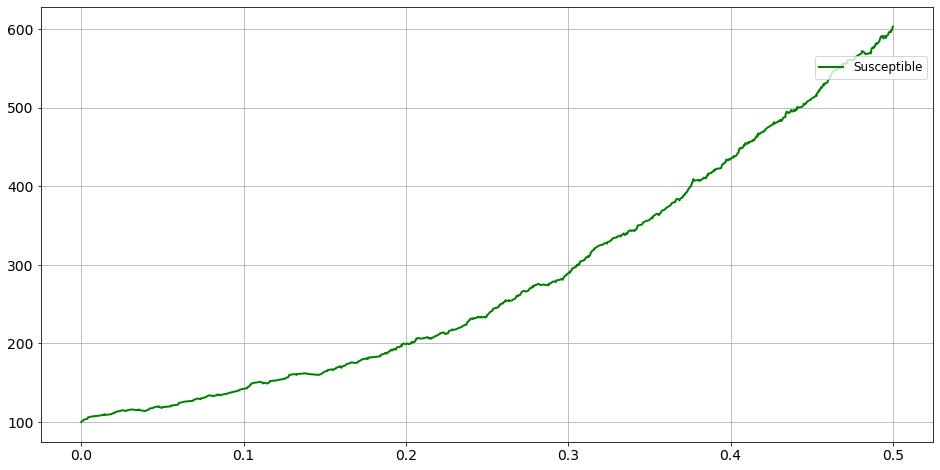

In [141]:
###Gillespie for court period
I,S,R,T=Gillespie_alg(100,9900,0,0,5,1)
temp_tab=[]
temp_I=[]
for i in range(len(T)):
    if T[i]<0.5:
        temp_tab.append(T[i])
        temp_I.append(I[i])
pyplot.figure(figsize=(16,8))

pyplot.plot(temp_tab,temp_I,linestyle="-",color='green',linewidth=2,label="Susceptible")
#pyplot.plot(T,I,linestyle="-",color='red',linewidth=2,label="Infectious")
#pyplot.plot(T,R,linestyle="-",color='orange',linewidth=2,label="Recovered")
#pyplot.plot(T,N,linestyle="-",color='blue',linewidth=2,label="Total population")
plotting_stuff()



pyplot.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


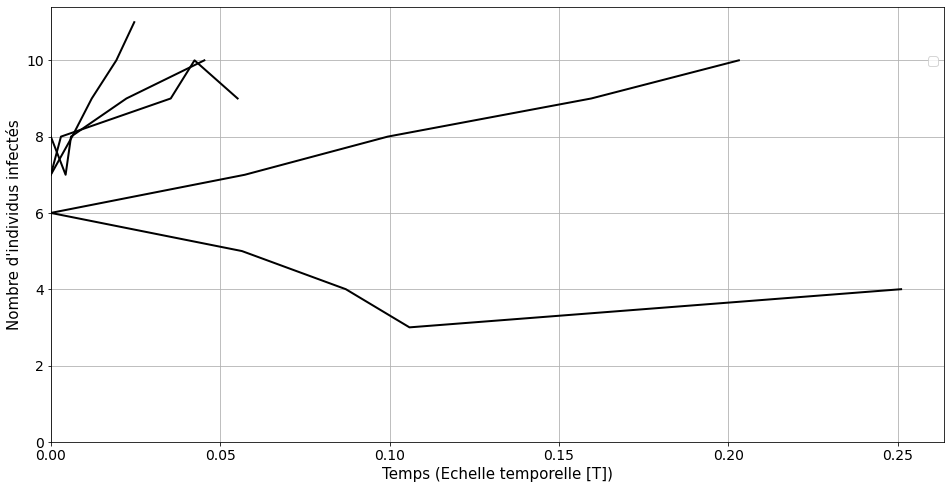

0


In [185]:
##Simulation Arret prématurée
fraction=0
pyplot.figure(figsize=(16,8))
for v in range (5):
    i=np.random.randint(2,10)
    s=10000-i
    r=0
    t=0
    I,S,R,T=[i],[s],[r],[t]
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r==1):
            fraction+=1
    

    pyplot.plot(T[:5],I[:5],linestyle="-",color="black",linewidth=2)
    #pyplot.plot(T[:],S[:],linestyle="-",linewidth=2,label="Infectious")
    #pyplot.plot(T[:5],R[:5],linestyle="-",linewidth=2)
pyplot.xlabel("Temps (Echelle temporelle [T])",size=15)
pyplot.ylabel("Nombre d'individus infectés",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
#pyplot.savefig("arret_premature_rebond",dpi=300)
plotting_stuff()
pyplot.show()
        
        
print (fraction)

In [208]:
###Gillespie n epidemie
fraction=0
for v in range (7000):
    I,S,R,T=[],[],[],[]
    i=1
    s=9999
    r=0
    t=0
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r<s):
            fraction+=1
        
prob=fraction/7000       
print (prob)
        
        
        

0.19857142857142857


In [209]:
fraction=0
for v in range (8000):
    I,S,R,T=[],[],[],[]
    i=1
    s=9999
    r=0
    t=0
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r<s):
            fraction+=1
        
prob=fraction/8000       
print (prob)

0.20025


In [210]:
fraction=0
for v in range (9000):
    I,S,R,T=[],[],[],[]
    i=1
    s=9999
    r=0
    t=0
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r<s):
            fraction+=1
        
prob=fraction/9000       
print (prob)

0.19977777777777778


In [211]:
fraction=0
for v in range (10000):
    I,S,R,T=[],[],[],[]
    i=1
    s=9999
    r=0
    t=0
    N=10000
    beta=5
    gamma=1
    while i!=0:
        lambda_total=((beta/N)*s*i)+(gamma*i)
        pi=((beta/N)*s*i)/lambda_total
        pg=gamma*i/lambda_total
        u1=np.random.uniform(0,1)
        delta_t=-math.log(u1)/lambda_total
        t+=delta_t
        u2=np.random.uniform(0,1)
        if u2<pi:
            i+=1
            s-=1
        else:
            r+=1
            i-=1
        I.append(i)
        S.append(s)
        R.append(r)
        T.append(t)
        if (i==0 and r<s):
            fraction+=1
        
prob=fraction/10000       
print (prob)

0.1985


In [43]:
print (571/3000)

0.19033333333333333


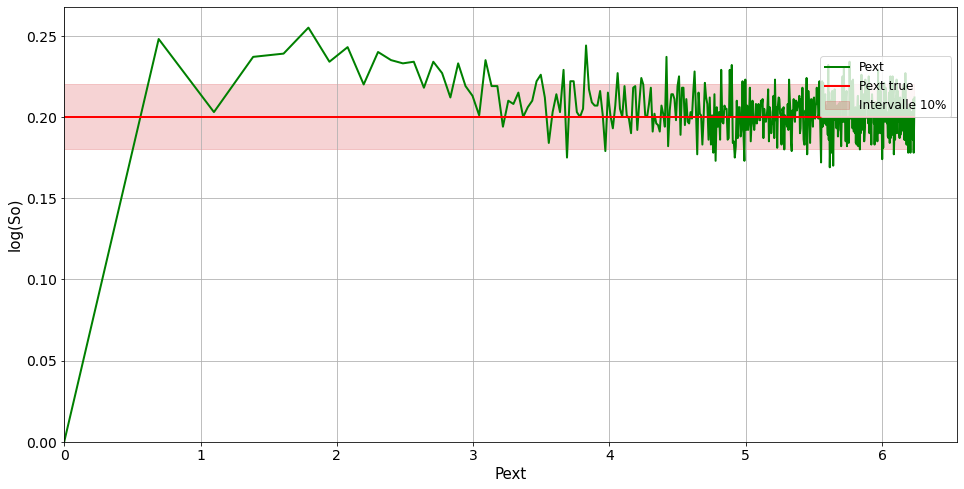

In [187]:
####Graphiquer Pext=lnSo
pext=[]
lnSo=[]
pyplot.figure(figsize=(16,8))
for s_value in range(1,513):
    lnSo.append(math.log(s_value))
    fraction=0
    for v in range (1000):
        I,S,R,T=[],[],[],[]
        i=1
        s=s_value
        r=0
        t=0
        N=i+s+r
        beta=5
        gamma=1
        while i!=0:
            lambda_total=((beta/N)*s*i)+(gamma*i)
            pi=((beta/N)*s*i)/lambda_total
            pg=gamma*i/lambda_total
            u1=np.random.uniform(0,1)
            delta_t=-math.log(u1)/lambda_total
            t+=delta_t
            u2=np.random.uniform(0,1)
            if u2<pi:
                i+=1
                s-=1
            else:
                r+=1
                i-=1
            I.append(i)
            S.append(s)
            R.append(r)
            T.append(t)
            if (i==0 and r<s):
                fraction+=1
    prob=fraction/1000
    pext.append(prob)
pyplot.plot(lnSo,pext,linestyle="-",color='green',linewidth=2,label="Pext")
good_value=[gamma/beta,gamma/beta]
x_good_value=[0,max(lnSo)]
pyplot.plot(x_good_value,good_value,linestyle="-",color='red',linewidth=2,label="Pext true")
good_value_lower=[i-0.1*i for i in good_value]
good_value_upper=[i+0.1*i for i in good_value]
pyplot.fill_between(x_good_value, good_value_lower, good_value_upper, alpha=0.2,color='tab:red',label="Intervalle 10%")
#pyplot.xscale('log')
pyplot.xlabel("Pext",size=15)
pyplot.ylabel("log(So)",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.savefig("pext_lnSo",dpi=300)
plotting_stuff()
pyplot.show()

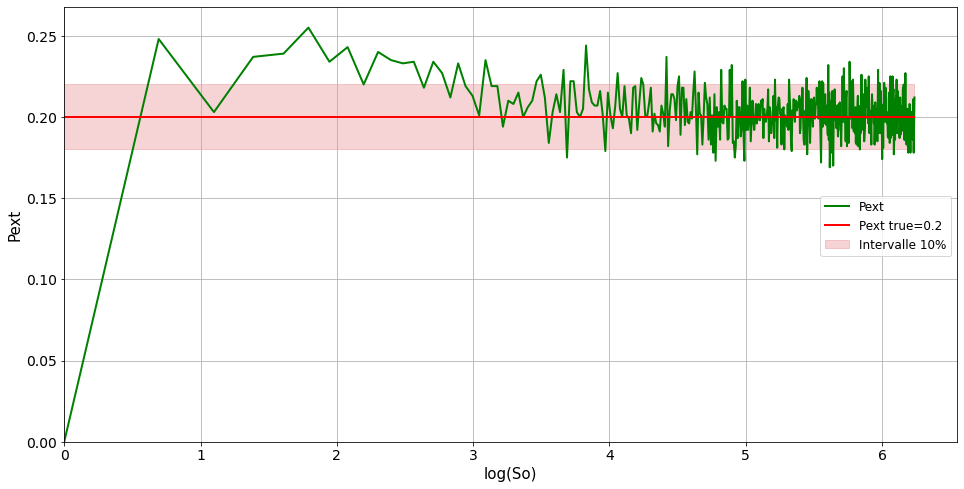

In [213]:
pyplot.figure(figsize=(16,8))
pyplot.plot(lnSo,pext,linestyle="-",color='green',linewidth=2,label="Pext")
good_value=[gamma/beta,gamma/beta]
x_good_value=[0,max(lnSo)]
pyplot.plot(x_good_value,good_value,linestyle="-",color='red',linewidth=2,label="Pext true=0.2")
good_value_lower=[i-0.1*i for i in good_value]
good_value_upper=[i+0.1*i for i in good_value]
pyplot.fill_between(x_good_value, good_value_lower, good_value_upper, alpha=0.2,color='tab:red',label="Intervalle 10%")
#pyplot.xscale('log')
pyplot.ylabel("Pext",size=15)
pyplot.xlabel("log(So)",size=15)
pyplot.xlim(0,)
pyplot.ylim(0,)
plotting_stuff()
pyplot.savefig("pext_lnSo.png",dpi=300)

pyplot.show()

In [216]:
s=np.exp(5)
s

148.4131591025766